WORKFLOW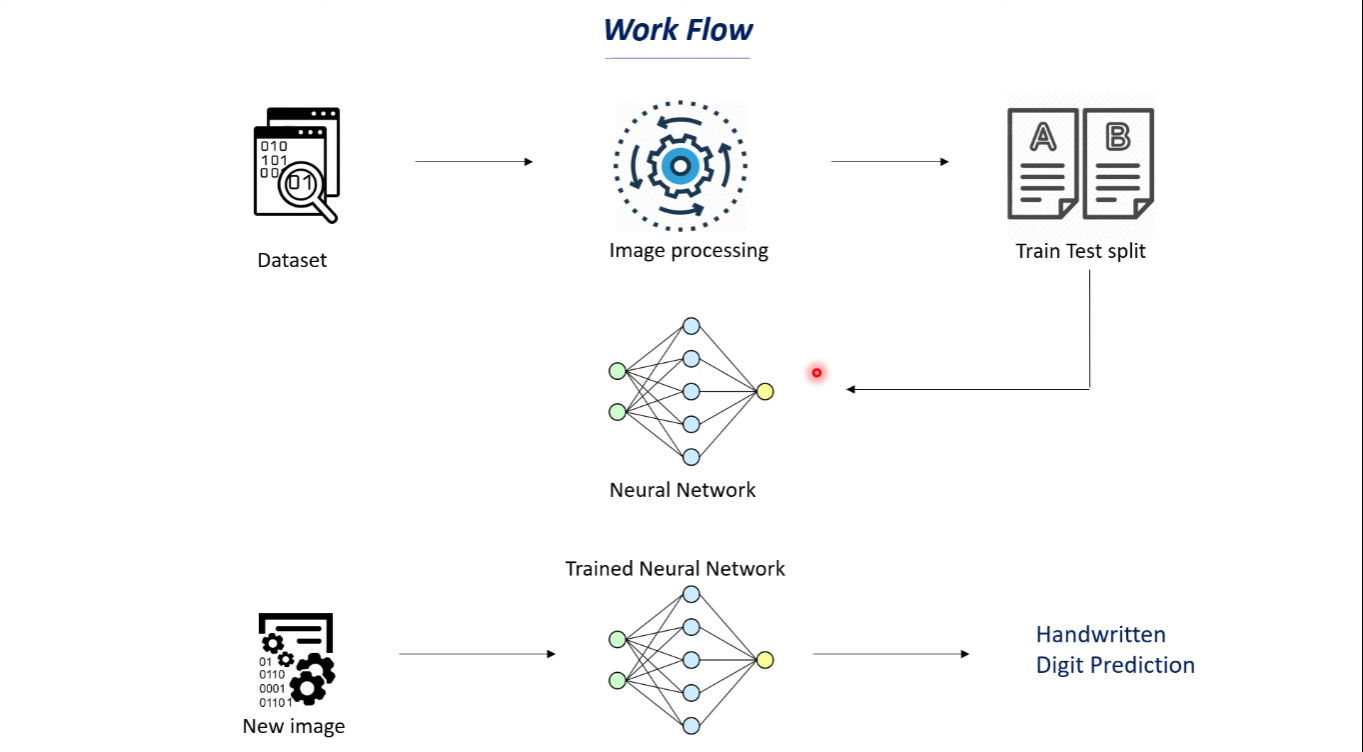

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 ## important library for image recognization
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
## mnist is already processed data
(X_train, Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape, Y_train.shape,X_test.shape,Y_test.shape)
# training_data=60000 images 28*28 dimension (grayscale images)
# test_data = 10000 images

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
# printing 5th image
print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

In [6]:
print(X_train[5].shape)

(28, 28)


9


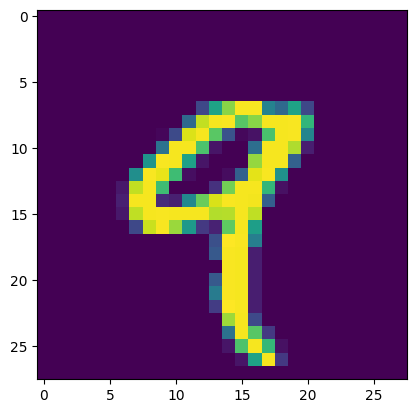

In [7]:
# displaying the image
plt.imshow(X_train[4])
plt.show

#print the corresponding label
print(Y_train[4])

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
# unique values in y train
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


WE can use these labels as such or we can also apply one hot encoding

In [10]:
# scaling the values
X_train = X_train/255
X_test = X_test/255

In [11]:
print(X_test[6])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the Neural Netwrok**

In [12]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')
                          ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# training the neural network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8538 - loss: 0.5129
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9558 - loss: 0.1516
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9672 - loss: 0.1089
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9744 - loss: 0.0848
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9800 - loss: 0.0685
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9838 - loss: 0.0564
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9858 - loss: 0.0471
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9873 - loss: 0.0412
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9894 - loss: 0.0362
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9907 - loss: 0.0312


In [16]:
loss , accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9685 - loss: 0.1173
0.97079998254776


trained data accuracy=99.0%
test data accuracy=97.0%

In [17]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
print(Y_test[0])

7


In [22]:
print(Y_pred.shape)

(10000, 10)


In [23]:
print(Y_pred[0])

[2.7302263e-04 5.8293121e-04 4.1663697e-01 7.0329541e-01 3.2428369e-07
 5.0137210e-06 7.8050674e-12 9.9999952e-01 5.7572317e-03 4.9963391e-01]


each number reperesent probability for each index example the pred for y to be zero is 2.73.... from above y_test we can confirm its actual ans is 7

In [25]:
# converting the prediciton probabilities to class labels(like 0 ,1, ...9)
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [27]:
# converting the prediciton probabilities to class labels(like 0 ,1, ...9) for all test data points
Y_pred_labels = [np.argmax(i) for i  in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 4, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 4, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels     
                                         Y_pred_labels ---->predicted labels

**Confusion Matrix**

In [28]:
conf_mat = confusion_matrix(Y_test , Y_pred_labels)

In [29]:
print(conf_mat)

tf.Tensor(
[[ 959    0    2    0    1    4    7    0    3    4]
 [   0 1111    3    5    4    0    4    1    7    0]
 [   4    0  994    4    2    3    3   10   11    1]
 [   0    0    4  974    1   13    0    3    4   11]
 [   0    0    1    0  965    0    5    1    1    9]
 [   2    0    1    8    1  867    4    0    5    4]
 [   2    2    1    0    7   11  934    0    1    0]
 [   1    2    7    3    2    0    0 1000    4    9]
 [   2    0    4    5    3   11    5    3  931   10]
 [   1    2    1    4   20    4    1    4    2  970]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

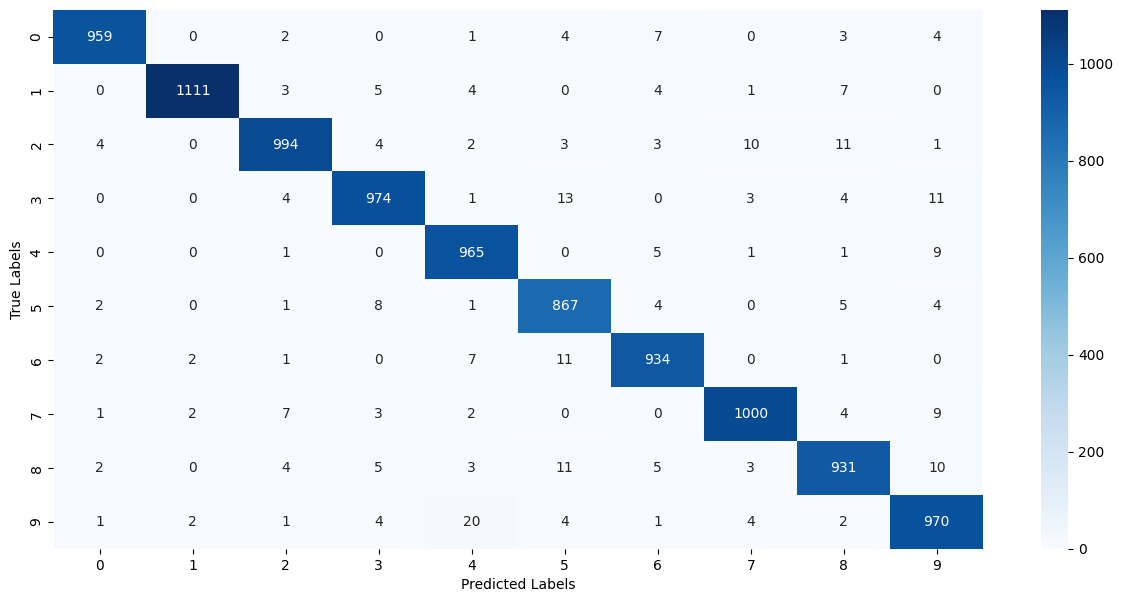

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Buliding a predicitve system

In [33]:
input_image = cv2.imread('/content/mnist_image_sample.png')

In [34]:
type(input_image)

numpy.ndarray

In [36]:
print(input_image)

[[[223 223 223]
  [159 159 159]
  [159 159 159]
  ...
  [159 159 159]
  [159 159 159]
  [169 169 169]]

 [[159 159 159]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[159 159 159]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[159 159 159]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[130 130 130]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[253 253 253]
  [231 231 231]
  [231 231 231]
  ...
  [231 231 231]
  [231 231 231]
  [231 231 231]]]


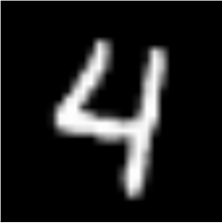

In [37]:
cv2_imshow(input_image)

In [38]:
input_image.shape

(223, 222, 3)

In [39]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)


In [40]:
grayscale.shape

(223, 222)

In [41]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [42]:
input_image_resize.shape

(28, 28)

In [43]:
cv2_imshow(input_image_resize)

In [44]:
input_image_resize=input_image_resize/255

In [45]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

reshape function will convert format from img to array

In [46]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[1.4189340e-03 1.1537035e-06 3.6558062e-03 2.9456721e-06 1.0000000e+00
  2.2594849e-04 2.7344921e-03 2.2520919e-01 1.5697880e-02 9.4908249e-01]]


In [47]:
input_prediction_label = np.argmax(input_prediction)

In [48]:
print(input_prediction_label)

4


**Predictive System**

Path of the image to be predicted: /content/mnist_image_sample.png


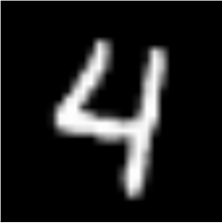

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The hand written Digit is :  4


In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

input_image_resize = cv2.resize(grayscale,(28,28))

input_image_resize=input_image_resize/255

image_reshaped = np.reshape(input_image_resize,[1,28,28])

input_prediction = model.predict(image_reshaped)

input_prediction_label = np.argmax(input_prediction)

print('The hand written Digit is : ',input_prediction_label)